In [1]:
import sys,os,time 
import h5py

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

sys.path.append('/home/nexus-admin/NEXUS_RF/BackendTools')
import PulseFitting as pf

In [2]:
day_str    = "20230216"
V_led      = 4.0
# f_avg_name = day_str+"_avg_pulses.h5"
f_avg_name = day_str+"_avg_pulses_Vled_"+str(V_led)+".h5"
data       = pd.read_hdf(f_avg_name, key="k2")
data

,time(ms),350,325,300,275,250,225,200,175,150,125,75,50,25
0,0.00,-0.188592,-0.479197,0.332786,-0.158362,-0.424223,-0.105836,-0.217757,-0.046467,-0.174286,-0.249555,-0.610472,-0.700167,-0.802517
1,0.02,-1.337009,-0.115532,-0.064904,0.121923,-0.183470,-0.206731,-0.226736,-0.221283,-0.210285,-0.215385,-0.749407,-0.511453,-0.898108
2,0.04,-2.247268,-0.036223,0.044333,-0.205014,-0.327067,-0.056962,-0.288954,-0.189616,-0.189123,-0.243325,-1.117856,-1.384289,-0.703629
3,0.06,0.022949,0.404777,-0.324982,-0.217126,-0.247949,-0.112788,-0.297270,-0.365510,-0.322261,-0.319762,-0.931847,-0.872240,-0.830766
4,0.08,-0.899107,0.240874,-0.129798,-0.237858,-0.430253,-0.227269,-0.138546,-0.268003,-0.294045,-0.274421,-0.528838,-0.797618,-1.065636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,99.90,-0.770632,-0.493762,-0.034923,-0.167199,-0.179262,-0.301565,-0.256344,-0.196510,-0.369939,-0.248358,-0.609636,0.147693,-0.934527
4996,99.92,-1.841207,-0.892056,-0.045655,-0.348079,-0.152591,-0.229658,-0.066010,-0.074791,-0.310282,-0.310597,-1.057771,-0.165292,-0.633680
4997,99.94,0.728956,-0.053417,-0.161321,-0.383926,-0.257823,-0.316287,-0.076717,-0.154436,-0.268216,-0.378973,-1.031799,-0.095203,-0.637188
4998,99.96,0.589356,0.309388,-0.550784,-0.307288,-0.094336,-0.316103,-0.342956,-0.172129,-0.204888,-0.398389,-0.338555,-0.572594,-0.461173


In [3]:
temps_mK   = np.array(data.keys()[1:]).astype(float)
print(temps_mK)

[350. 325. 300. 275. 250. 225. 200. 175. 150. 125.  75.  50.  25.]


In [4]:
if True:
    temps_mK = temps_mK[ (temps_mK <= 200) ]
    data = data[['time(ms)']+[str(int(temp)) for temp in temps_mK]]

In [5]:
t0 = 4.99
pf.set_fixed_param("t0_ms",t0)
pf.show_fixed_params()

## How much attenuation is in the lines before the chip
line_atten_dB = 56.5

"t0_ms" 4.99


<IPython.core.display.Javascript object>


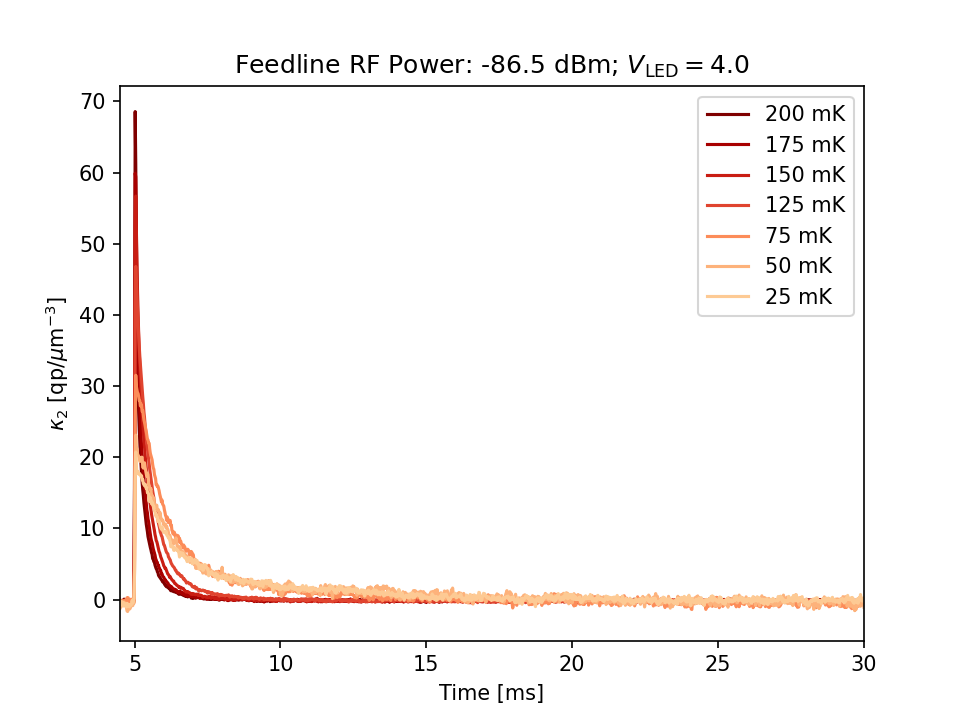

<IPython.core.display.Javascript object>


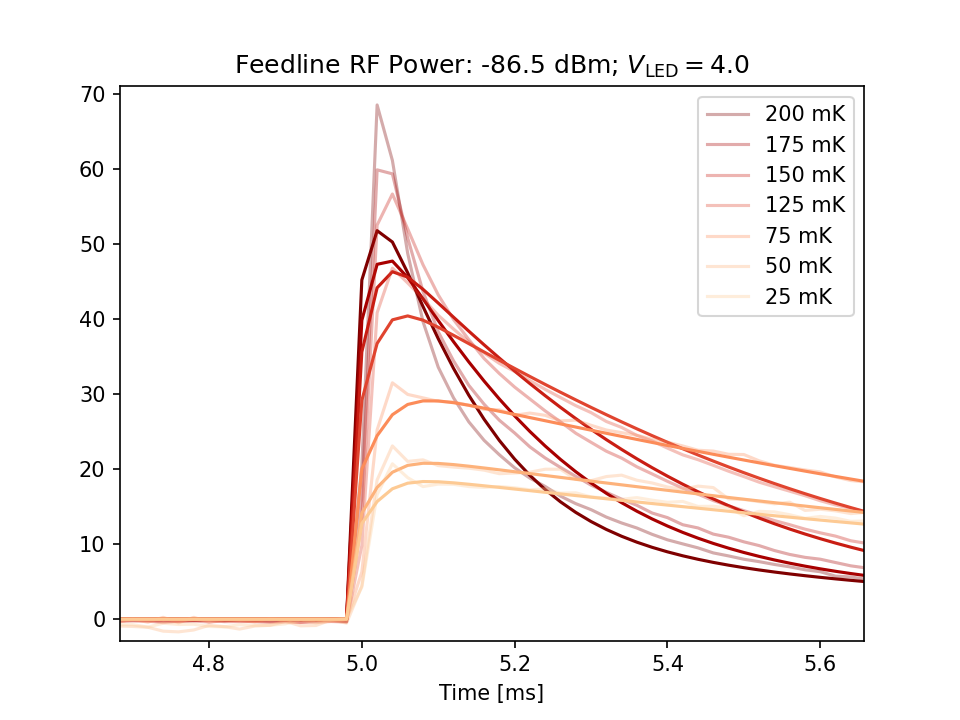

200mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.11999999999999922 ms
     Amplitude at t=0:     7.862783788055518e+19


<IPython.core.display.Javascript object>


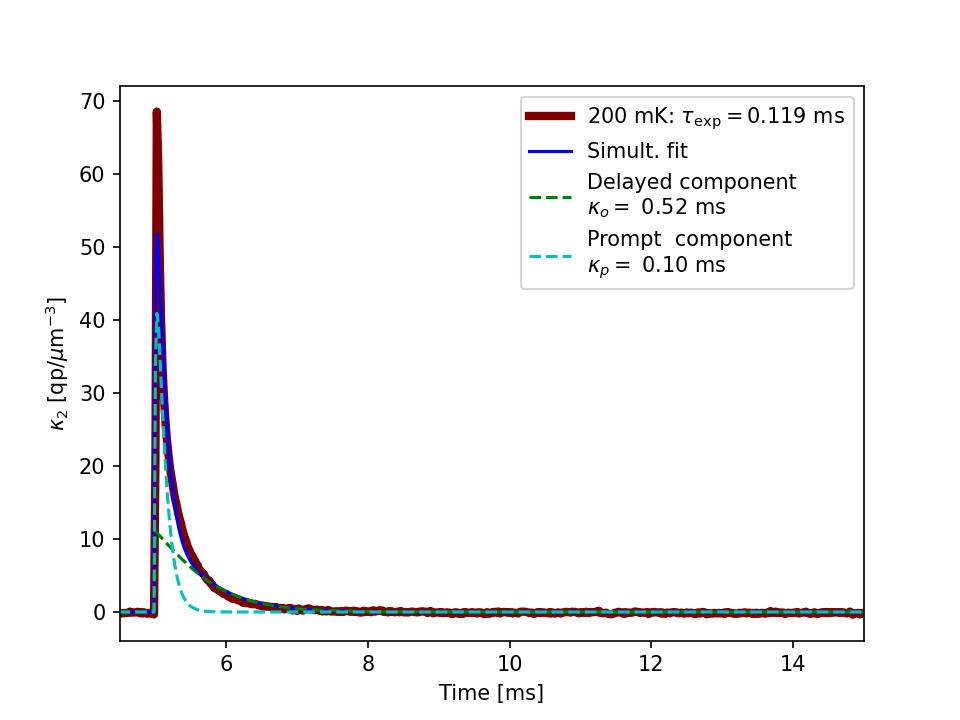

175mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.21999999999999975 ms
     Amplitude at t=0:     424789933875.6853


<IPython.core.display.Javascript object>


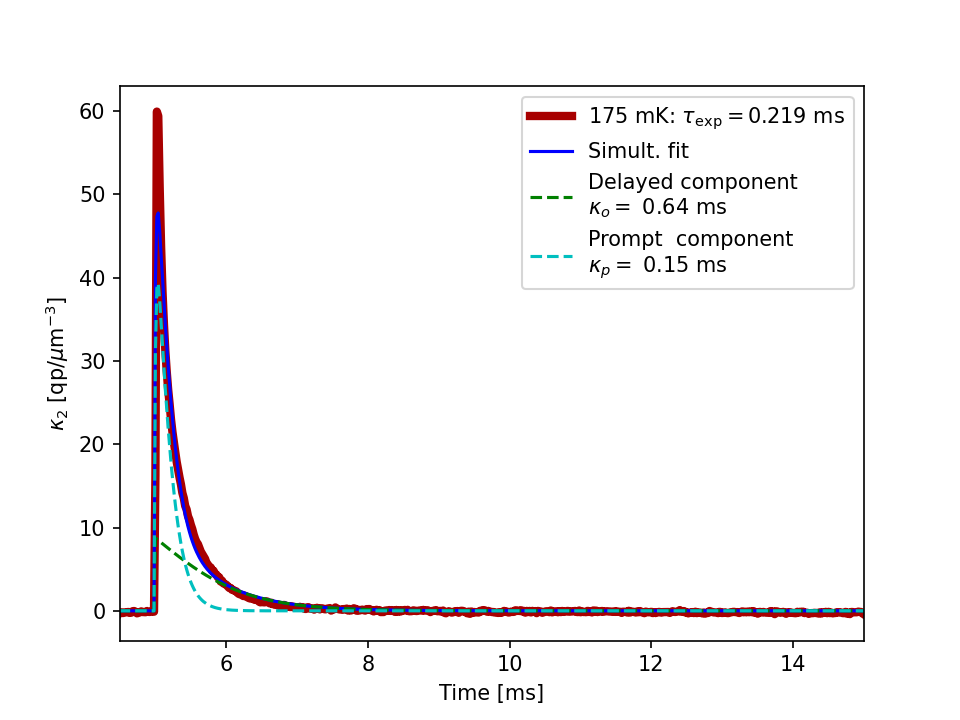

150mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.3200000000000003 ms
     Amplitude at t=0:     335629821.6389829


<IPython.core.display.Javascript object>


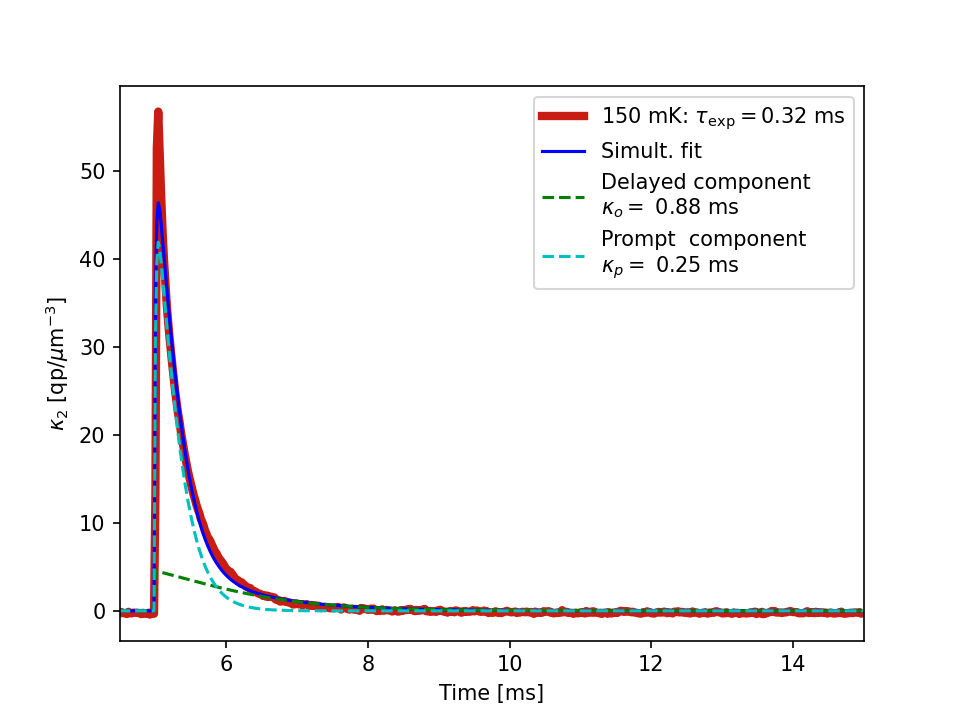

125mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  0.5199999999999996 ms
     Amplitude at t=0:     688479.6433651245


<IPython.core.display.Javascript object>


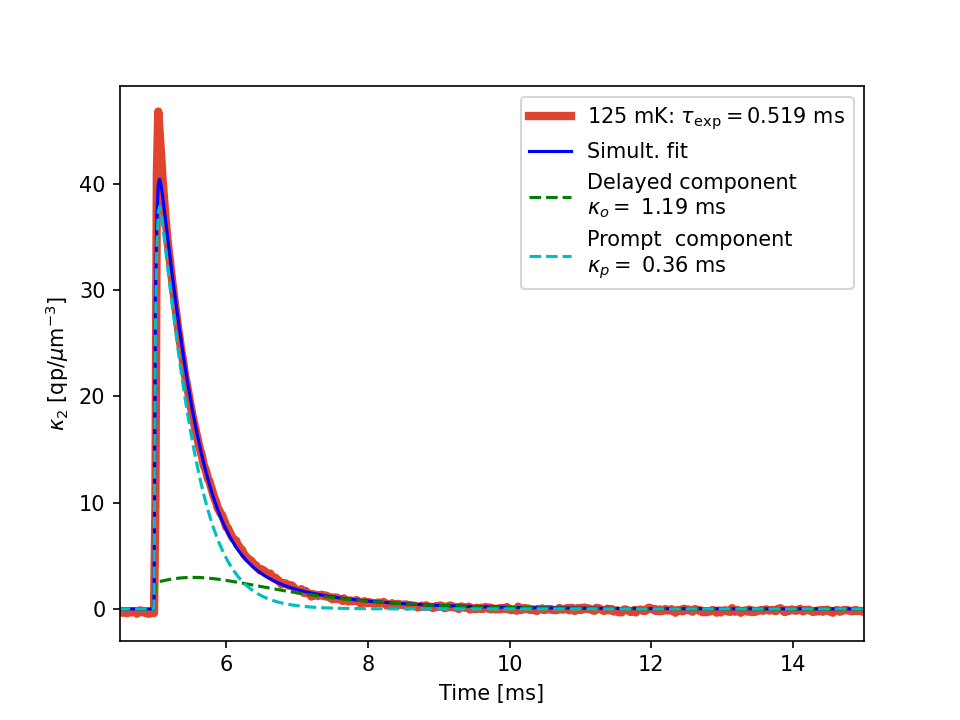

75mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  1.08 ms
     Amplitude at t=0:     3200.473139233497


<IPython.core.display.Javascript object>


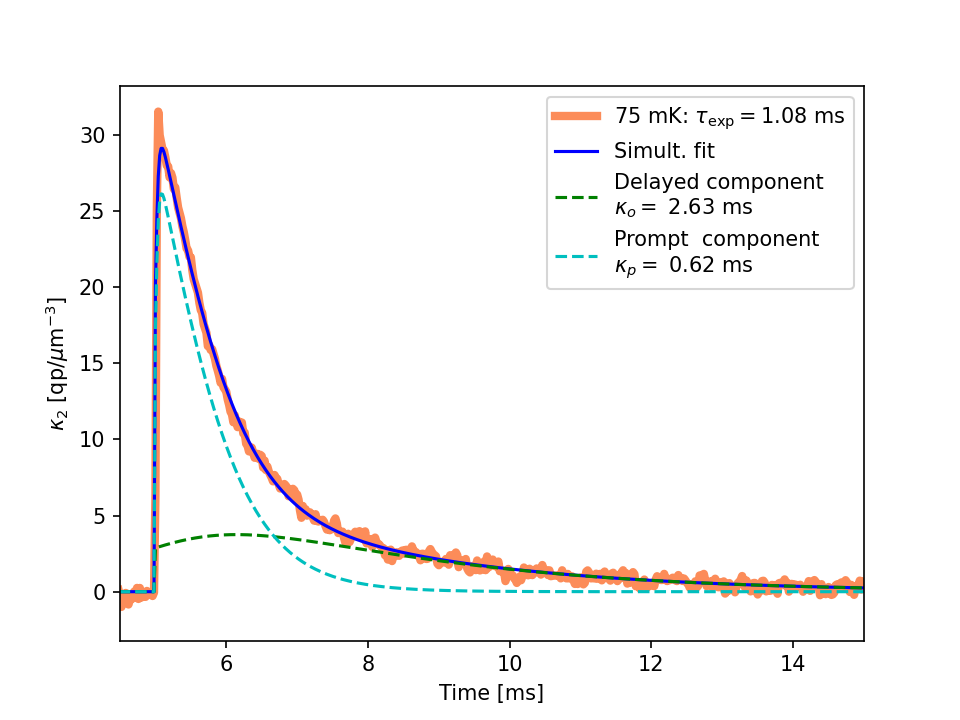

50mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  1.2000000000000002 ms
     Amplitude at t=0:     1478.0242982170987


<IPython.core.display.Javascript object>


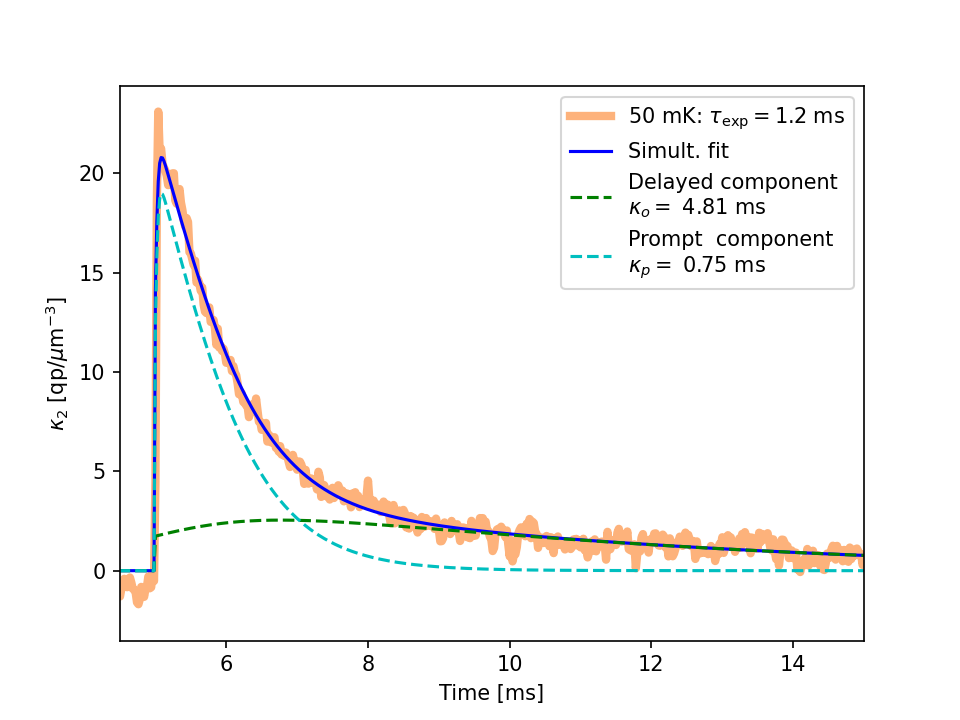

25mK----------
-- Parameter guess for single exponential -- 
     Decay time constant:  1.2400000000000002 ms
     Amplitude at t=0:     1159.323970643861


<IPython.core.display.Javascript object>


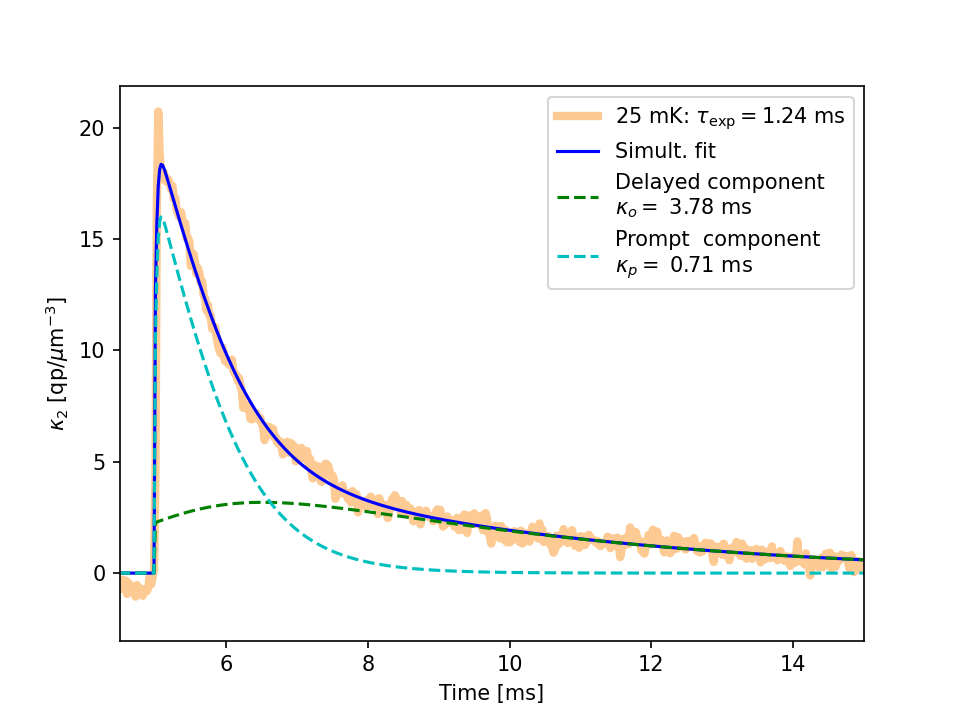

In [15]:
t_max_ms = 15.0
xlims    = [4.5, t_max_ms]

## Pulse units label
pls_label = r"$\kappa_2$ [qp/$\mu$m$^{-3}$]"

## Decide which style of notebook plots to create
interactive = True

## Decide which fit model to use
conv = False
    
## Create a figure for all pulses
cmap = plt.get_cmap('OrRd')

if interactive:
    %matplotlib notebook
    ax0    = plt.figure("A").gca()
    ax00   = plt.figure("AA").gca()
else:
    ax0    = plt.figure("A" ,figsize=(10,8),dpi=500).gca()
    ax00   = plt.figure("AA",figsize=(10,8),dpi=500).gca()

ax0.set_xlabel("Time [ms]")
ax0.set_ylabel(pls_label)
ax0.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))

ax00.set_xlabel("Time [ms]")
ax0.set_ylabel(pls_label)
ax00.set_title("Feedline RF Power: "+str(-30-line_atten_dB)+r" dBm; $V_\mathrm{LED}=$"+str(4.00))
ax00.set_xlim(xlims)

## Initialize containers for our initial guesses
N_temps        = len(temps_mK)
lifetimes      = np.zeros(N_temps)
amplitudes     = np.zeros(N_temps)
prompt_fall_ms = np.zeros(N_temps)
delayd_fall_ms = np.zeros(N_temps)
pulse_max_phse = np.zeros(N_temps)
prompt_fall_err= np.zeros(N_temps)
delayd_fall_err= np.zeros(N_temps)

## Initialize a data frame for the optimal parameters
param_names = ['amp delay', 'rise delay [ms]', 'fall delay [ms]', 'amp prompt', 'rise prompt [ms]', 'fall prompt [ms]']
popt_data = pd.DataFrame(columns=param_names)

for i in np.arange(N_temps):
    k = data.keys()[1+i]
    print(k+ "mK----------")
    
    ## Get the color for this temperature
    color=cmap( (float(k)+50) / (np.max(temps_mK)+50) )
    
    ## Pull the averate pulse and time values
    t_vals = np.array(data["time(ms)"]) #- ts
    p_vals = np.array(data[k])
    
    #### === ==================== === ###
    
    ## Estimate the single exponential parameters
    param_est = pf.estimate_params(t_vals, p_vals, t_cutoff_ms=15.0, verbose=True)
    
    ## Save our calculated guesses for plotting later
    lifetimes[i]      = param_est["tau"]
    amplitudes[i]     = param_est["amp"]
    pulse_max_phse[i] = param_est["pmax"]
    
    ## Run the fit routine
    ## tp_guess (float): guess for time constant: prompt rise time
    ## td_guess (float): guess for time constant: delayed rise time
    ## kd_fac_guess (float): multiplicative factor of prompt fall time to guess delayed fall time
    ## ad_fac_guess (float): divisive factor of prompt amplitude (at t=0) to guess delayed amplitude
    p_guess, p_opt, p_cov = pf.run_fit(t_vals, p_vals, param_est, 
                                       tp_guess=0.5, td_guess=5.0, 
                                       kd_fac_guess=5.0, ad_fac_guess=5.0, 
                                       t_cutoff_ms=t_max_ms,
                                       convolve=conv)
    
    if p_opt is not None:
        ## Calculate standard error on parameters
        p_err = np.sqrt(np.diag(p_cov))
        
        ## Save the optimal parameters to the dataframe
        popt_data = popt_data.append({param_names[i]:p_opt[i] for i in np.arange(len(param_names))},ignore_index=True)
        
        ## Get a curve for the optimal shape
        if conv:
            all_pls   = pf.dbl_pls_shape_conv(t_vals,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5])
        else:
            all_pls   = pf.dbl_pls_shape(t_vals,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5])
        
        ## Save our optimal parameters for plotting later
        prompt_fall_ms[i] = p_opt[5]
        delayd_fall_ms[i] = p_opt[2]

        prompt_fall_err[i] = p_err[5]
        delayd_fall_err[i] = p_err[2]
    else:
        ## Save placeholders to the dataframe
        popt_data = popt_data.append({param_names[i]:np.nan for i in np.arange(len(param_names))},ignore_index=True)
        
    ## Get a curve for the best guess
    if conv:
        all_guess = pf.dbl_pls_shape_conv(t_vals,p_guess[0],p_guess[1],p_guess[2],p_guess[3],p_guess[4],p_guess[5])
    else:
        all_guess = pf.dbl_pls_shape(t_vals,p_guess[0],p_guess[1],p_guess[2],p_guess[3],p_guess[4],p_guess[5])
    
    #### === ==================== === ###
    
    ## Add the average pulse to the to the plot of all temperatures
    ax0.plot( t_vals, p_vals, label=k+r" mK" , color=color)
    ax00.plot( t_vals, p_vals, label=k+r" mK" , color=color, alpha=0.33)
    
    ## Create a new plot for each individual temperature
    if interactive:
        plt.figure(str(i)+"B")
    else:
        plt.figure(str(i)+"B",figsize=(8,6),dpi=500)
    ax1 = plt.gca()
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel(pls_label)
    
    ## Plot the pulse
#     ax1.plot( t_vals, p_vals, label=k+" mK", color=color, linewidth=4)
    ax1.plot( t_vals, p_vals, label=k+r" mK: $\tau_\mathrm{exp}=$"+str(int(lifetimes[i]*1e3)/1000.)+" ms", color=color, linewidth=4)
    ylims = ax1.get_ylim()
    
    ## Draw the single exponential guess
    if False:
        ax1.plot( t_vals, pf.exp_fit(t_vals,amplitudes[i],lifetimes[i]), 'k:', label='Single exponential')
    
    ## Draw the overall shape
    if p_opt is None:
        ax1.plot( t_vals, all_guess, 'b:', label="Initial guess")
    if p_opt is not None:
        ax1.plot( t_vals, all_pls  , 'b-', label="Simult. fit")# - optimal")
        ax00.plot(t_vals, all_pls  , label=None, color=color, ls='-')

        ## Draw the prompt and delayed components' individual shapes
        ax1.plot( t_vals, pf.double_exp(t_vals,p_opt[0],p_opt[1],p_opt[2]), 'g--', label="Delayed component\n"+r"$\kappa_o=$ %.2f ms" % p_opt[2])
        ax1.plot( t_vals, pf.double_exp(t_vals,p_opt[3],p_opt[4],p_opt[5]), 'c--', label="Prompt  component\n"+r"$\kappa_p=$ %.2f ms" % p_opt[5])
    
    ## Finalize the axes
    # ax1.set_ylim(ylims)
    ax1.set_xlim(xlims if float(k)<201.0 else [xlims[0],6.5])#10.0])
    ax1.legend()
    
ax0.legend()
ax0.set_xlim([xlims[0],2.0*t_max_ms])

ax00.legend()

popt_data['Temp [mK]'] = temps_mK

In [16]:
popt_data

,amp delay,rise delay [ms],fall delay [ms],amp prompt,rise prompt [ms],fall prompt [ms],Temp [mK]
0,44.805532,56.263282,0.516669,106.847974,0.013982,0.103301,200.0
1,35.231372,279.183725,0.636108,96.556814,0.014490,0.154593,175.0
2,18.304730,4.377653,0.883878,97.080857,0.015737,0.245459,150.0
3,9.809437,0.429024,1.188181,85.964901,0.018735,0.356165,125.0
4,11.434078,0.706656,2.627541,58.033571,0.025844,0.622347,75.0
5,6.915194,0.806866,4.812079,41.278614,0.023508,0.747781,50.0
6,9.047664,0.774360,3.776255,34.850199,0.023154,0.709098,25.0


<IPython.core.display.Javascript object>


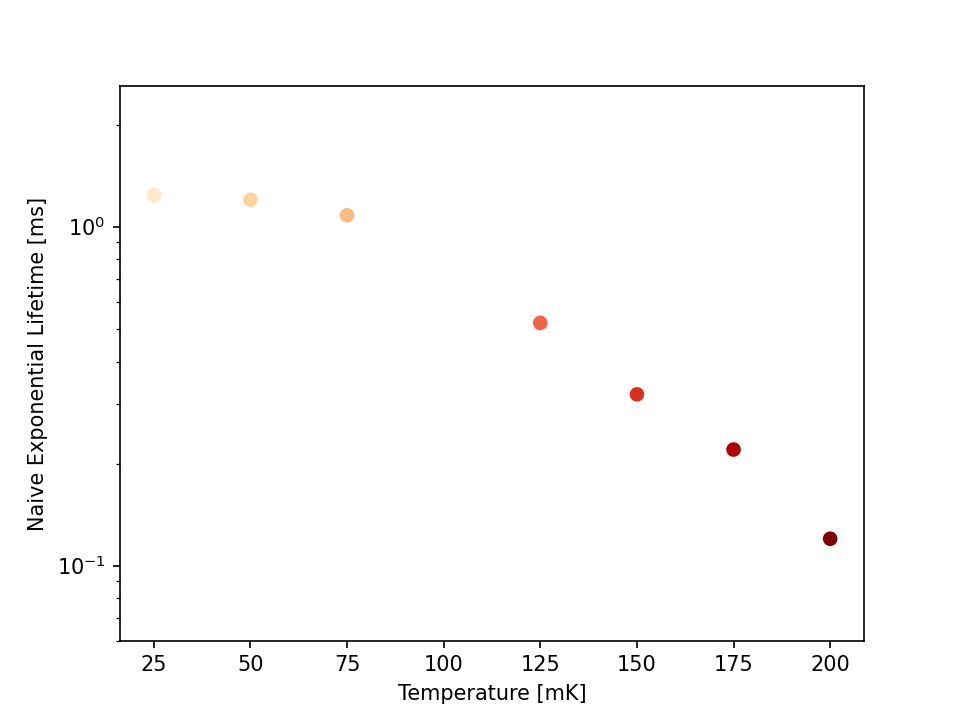

In [17]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,lifetimes,c=cmap( temps_mK / np.max(temps_mK) ))
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Naive Exponential Lifetime [ms]")
if True:
    ylims = ax.get_ylim()
    ax.set_ylim([0.5*np.min(lifetimes[lifetimes>0]) , 2*ylims[1]])
    ax.set_yscale('log')

In [19]:
kB    = 8.617333262e-5 ## eV/K
Delta = 184e-6 ## eV
tau0  = 438.0e-9 ## sec -- from https://journals.aps.org/prb/abstract/10.1103/PhysRevB.14.4854
Tc    = 1.19 ## K -- from https://journals.aps.org/prb/abstract/10.1103/PhysRevB.14.4854
def theory_curve(T_K,Tc_K,delta_eV,tau0_s):
    return ( (tau0_s/np.sqrt(np.pi)) * 
            np.power(kB*Tc_K/(2*delta_eV),5./2.) * 
            np.sqrt(Tc_K/T_K) * 
            np.exp(delta_eV/(kB*T_K)) )

<IPython.core.display.Javascript object>


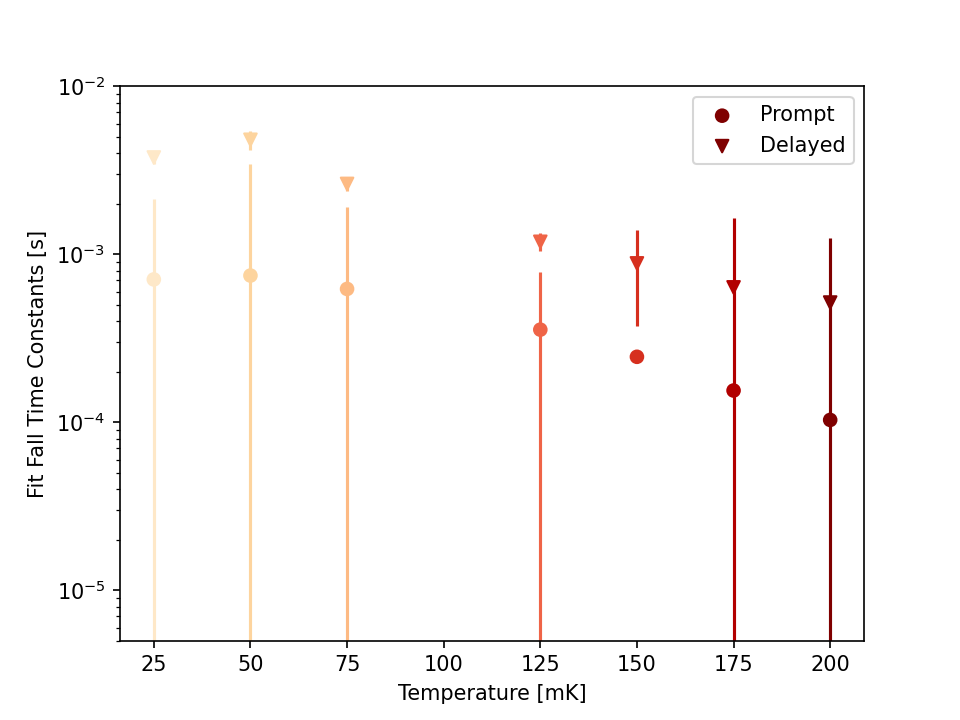

In [20]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,prompt_fall_ms*1e-3,c=cmap( temps_mK / np.max(temps_mK) ),marker='o',label="Prompt")
ax.scatter(temps_mK,delayd_fall_ms*1e-3,c=cmap( temps_mK / np.max(temps_mK) ),marker='v',label="Delayed")
for i in np.arange(len(temps_mK)):
    ax.errorbar(temps_mK[i],prompt_fall_ms[i]*1e-3,yerr=prompt_fall_err[i]*1e-3,c=cmap( temps_mK[i] / np.max(temps_mK) ),marker=None,ls='None')
    ax.errorbar(temps_mK[i],delayd_fall_ms[i]*1e-3,yerr=delayd_fall_err[i]*1e-3,c=cmap( temps_mK[i] / np.max(temps_mK) ),marker=None,ls='None')
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Fit Fall Time Constants [s]")
if True:
    ylims = ax.get_ylim()
    ax.set_ylim([0.3*np.min(lifetimes[delayd_fall_ms>0]*1e-3) , 2*ylims[1]])
    if True:
        ax.set_ylim([5e-6,1e-2])
    ax.set_yscale('log')
if False:
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    xrange = np.linspace(start=xlims[0],stop=xlims[1],num=1000)
    theory = theory_curve(xrange/1e3,Tc,Delta,tau0)
    ax.plot(xrange,theory,'k-')
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
ax.legend(loc='best')

<IPython.core.display.Javascript object>


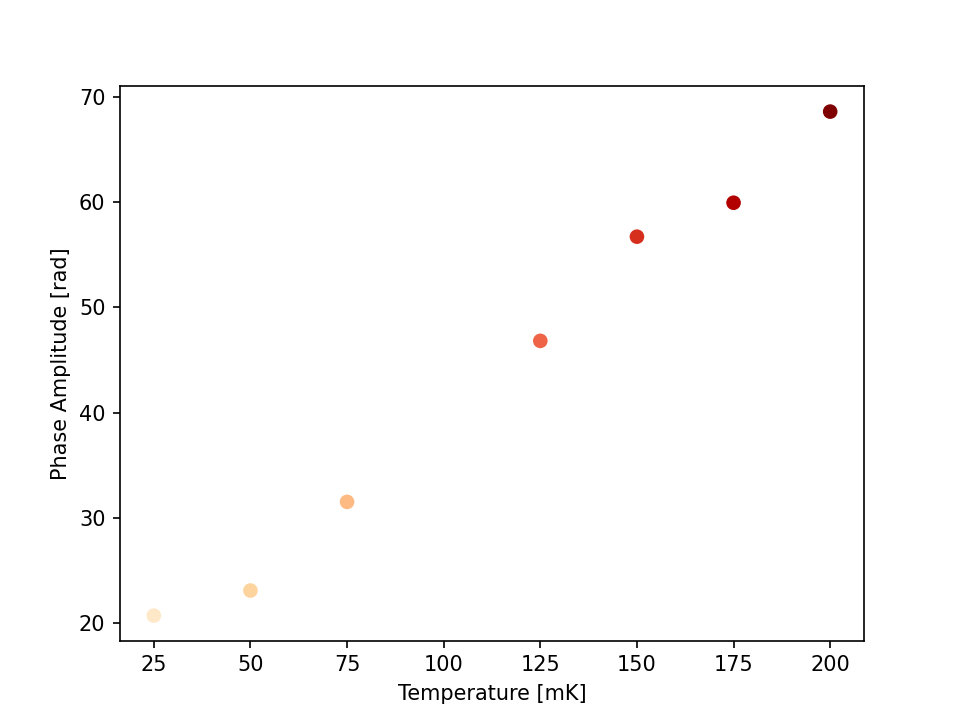

In [21]:
if interactive:
    ax = plt.figure().gca()
else:
    ax = plt.figure(dpi=500).gca()
ax.scatter(temps_mK,pulse_max_phse,c=cmap( temps_mK / np.max(temps_mK) ),marker='o')
ax.set_xlabel("Temperature [mK]")
ax.set_ylabel("Phase Amplitude [rad]")
if False:
    ylims = ax.get_ylim()
    ax.set_ylim([0.3*np.min(pulse_max_phse[pulse_max_phse>0]) , 2*ylims[1]])
    ax.set_yscale('log')